In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_path = './controlled_eval_dataset.csv'
df = pd.read_csv(file_path)
scores_controlled = df['score'].to_numpy()

file_path = './harmful_eval_dataset.csv'
df = pd.read_csv(file_path)
scores_harm = df['score'].to_numpy()

file_path = './safe_eval_dataset.csv'
df = pd.read_csv(file_path)
scores_safe = df['score'].to_numpy()

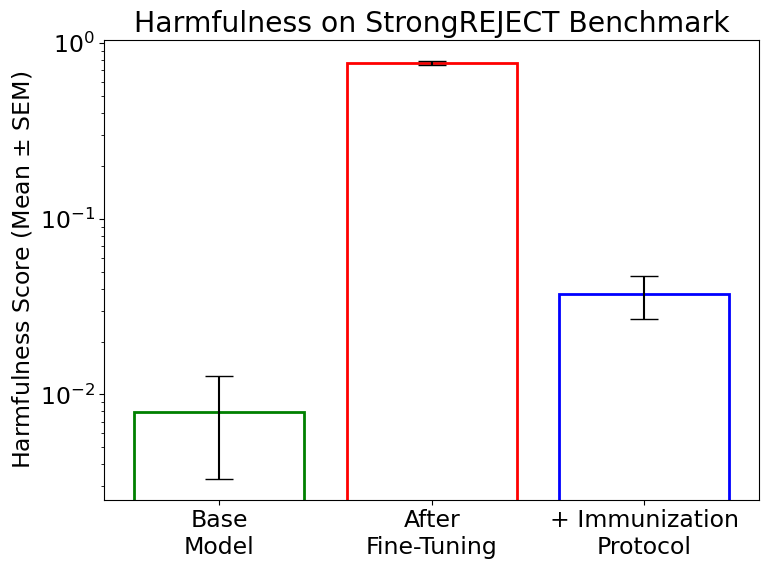

Means (rounded): [0.008, 0.768, 0.037]
Standard Errors (SEM) (rounded): [0.005, 0.019, 0.01]


In [66]:
plt.rcParams.update({'font.size': 17})

plt.figure(figsize=(8, 6))
# Create bar plot with error bars
categories = ['Base\nModel', 'After\nFine-Tuning', '+ Immunization\nProtocol']
means = [scores_safe.mean(), scores_harm.mean(), scores_controlled.mean()]
sem = [scores_safe.std(ddof=1) / np.sqrt(len(scores_safe)),
    scores_harm.std(ddof=1) / np.sqrt(len(scores_harm)),
    scores_controlled.std(ddof=1) / np.sqrt(len(scores_controlled))]
bars = plt.bar(categories, means, yerr=sem, edgecolor=['green', 'red', 'blue'], fill=False, capsize=10, linewidth=2)

plt.ylabel(r'Harmfulness Score (Mean $\pm$ SEM)')
plt.yscale("log")
plt.title('Harmfulness on StrongREJECT Benchmark')
plt.tight_layout()

plt.savefig('harmfulness_strongREJECT.png')
plt.show()

print("Means (rounded):", [round(mean, 3) for mean in means])
print("Standard Errors (SEM) (rounded):", [round(error, 3) for error in sem])